In [1]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
import yaml

from model.model import get_model
from data_loader import TrainDataModule, get_all_test_dataloaders, get_normal_test_dataloader

# autoreload imported modules
%load_ext autoreload
%autoreload 2
%matplotlib inline


# with open("./configs/ganomaly_config.yaml", "r") as f:
with open("./configs/ganomaly_config.yaml", "r") as f:
    config = yaml.safe_load(f)

# Reproducibility
pl.seed_everything(config["seed"])

test_dataloaders = get_all_test_dataloaders(config['split_dir'], config['target_size'], config['batch_size'])

Global seed set to 42


img_csv='./data/splits/absent_septum.csv' 
 len(self.img_paths)=1
img_csv='./data/splits/artefacts.csv' 
 len(self.img_paths)=16
img_csv='./data/splits/craniatomy.csv' 
 len(self.img_paths)=15
img_csv='./data/splits/dural.csv' 
 len(self.img_paths)=7
img_csv='./data/splits/ea_mass.csv' 
 len(self.img_paths)=4
img_csv='./data/splits/edema.csv' 
 len(self.img_paths)=18
img_csv='./data/splits/encephalomalacia.csv' 
 len(self.img_paths)=1
img_csv='./data/splits/enlarged_ventricles.csv' 
 len(self.img_paths)=19
img_csv='./data/splits/intraventricular.csv' 
 len(self.img_paths)=1
img_csv='./data/splits/lesions.csv' 
 len(self.img_paths)=22
img_csv='./data/splits/mass.csv' 
 len(self.img_paths)=22
img_csv='./data/splits/posttreatment.csv' 
 len(self.img_paths)=44
img_csv='./data/splits/resection.csv' 
 len(self.img_paths)=10
img_csv='./data/splits/sinus.csv' 
 len(self.img_paths)=2
img_csv='./data/splits/wml.csv' 
 len(self.img_paths)=5
img_csv='./data/splits/other.csv' 
 len(self.img_paths)=

In [2]:
# load model from checkpit
from model.ganomaly.lightning_model import Ganomaly


model = get_model(config)
# Specify the path to your checkpoint file
checkpoint_path = '/home/marcel/Projects/uni/mad_seminar/lightning_logs/version_14/checkpoints/epoch=149-step=6900.ckpt'

# Initialize the model by loading from the checkpoint
model.load_state_dict(torch.load(checkpoint_path)['state_dict'])


Loading model ganomaly


<All keys matched successfully>

In [20]:
from ganomaly_eval import  GanomalyEvaluator, EvalType
normal_test_dataloader = get_normal_test_dataloader(config['split_dir'], config['target_size'], config['batch_size'])
normal_and_abnormal = test_dataloaders.copy()
normal_and_abnormal.update({"normal":normal_test_dataloader})


evaluator = GanomalyEvaluator(model, normal_and_abnormal)

evaluator.evaluate_model()

img_csv='./data/splits/normal_test.csv' 
 len(self.img_paths)=30


                    Statistics of Anomaly Scores per categroy                    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Pathology           ┃ Minimum ┃ Maximum ┃ Median ┃ Mean ┃ Variance ┃ #Samples ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ absent_septum       │    0.67 │    0.67 │   0.67 │ 0.67 │     0.00 │        1 │
│ artefacts           │    0.24 │    0.68 │   0.35 │ 0.36 │     0.01 │       16 │
│ craniatomy          │    0.22 │    2.39 │   0.50 │ 0.63 │     0.25 │       15 │
│ dural               │    0.21 │    1.10 │   0.67 │ 0.63 │     0.10 │        7 │
│ ea_mass             │    0.61 │    1.11 │   1.07 │ 0.97 │     0.04 │        4 │
│ edema               │    0.31 │    3.63 │   0.58 │ 0.76 │     0.51 │       18 │
│ encephalomalacia    │    2.32 │    2.32 │   2.32 │ 2.32 │     0.00 │        1 │
│ enlarged_ventricles │    0.27 │    2.26 │   0.49 │ 0.73 │     0.35 │       19 │
│ intraventricular    │    0.63 │    0.63 │   0.63 │ 0.63 │     0.00 │        1 │
│ lesions             │    0.28 │    1.14 │   0.42 │ 0.56 │     0.08 │       22 │
│ mass                │    0.35 │    1.15 │   0.54 │ 0.62 │     0.06 │       22 │
│ posttreatment       │    0.24 │    3.32 │   0.47 │ 0.54 │     0.22 │       44 │
│ resection           │    0.29 │    2.30 │   0.73 │ 0.98 │     0.52 │       10 │
│ sinus               │    0.32 │    0.88 │   0.60 │ 0.60 │     0.08 │        2 │
│ wml                 │    0.28 │    0.66 │   0.41 │ 0.46 │     0.03 │        5 │
│ other               │    0.43 │    1.05 │   0.58 │ 0.72 │     0.07 │        5 │
│ normal              │    0.18 │    2.26 │   0.35 │ 0.59 │     0.31 │       30 │
└─────────────────────┴─────────┴─────────┴────────┴──────┴──────────┴──────────┘

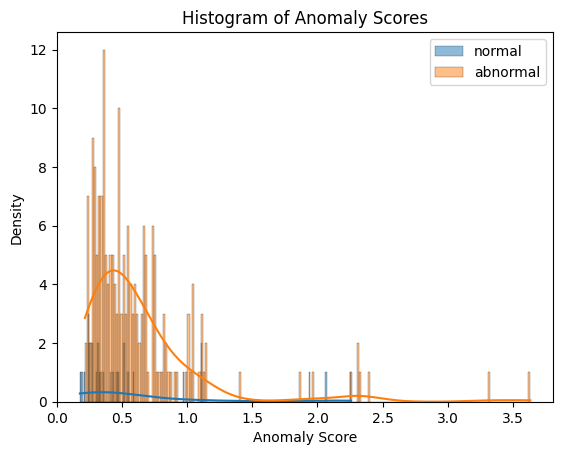

In [21]:
evaluator.histplot()

In [15]:
evaluator.histplot(eval_type=EvalType.ABNORMAL)

In [ ]:
# from evaluate import Evaluator 

# evaluator = Evaluator(model, model.device, test_dataloaders)

# metrics, fig_metrics, fig_example = evaluator.evaluate()

In [ ]:
# fig_metrics.keys()

In [ ]:
# fig_metrics['F1']

In [ ]:
# fig_example.savefig(f"example_{config['num_epochs']}.png")